Part 1: Importing Libraries and Setting Up Data Paths

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

# Define paths
train_data = os.path.join(os.getcwd(), 'data', 'train')
test_data = os.path.join(os.getcwd(), 'data', 'test')

# Ensure directories exist
if not os.path.exists(train_data):
    print(f"Training data directory does not exist: {train_data}")
    exit()
if not os.path.exists(test_data):
    print(f"Test data directory does not exist: {test_data}")
    exit()


Part 2: Data Augmentation and Generators

In [2]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    test_data,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


Found 35882 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Part 3: Define the Model

In [3]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))  # 7 classes for 7 emotions

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


c:\Users\Mojtaba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

None


Part 4: Count Images and Train the Model

In [4]:
# Count number of images
num_train_imgs = sum([len(files) for _, _, files in os.walk(train_data)])
num_test_imgs = sum([len(files) for _, _, files in os.walk(test_data)])

print(f"Number of training images: {num_train_imgs}")
print(f"Number of test images: {num_test_imgs}")

# Train model
epochs = 30
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_imgs // 32,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_test_imgs // 32
)


Number of training images: 35882
Number of test images: 7178
Epoch 1/30


c:\Users\Mojtaba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1120/1121 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2535 - loss: 1.7989

c:\Users\Mojtaba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1121/1121 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.2535 - loss: 1.7988 - val_accuracy: 0.3697 - val_loss: 1.6607
Epoch 2/30
   1/1121 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - accuracy: 0.2812 - loss: 1.7266

c:\Users\Mojtaba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1121/1121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2812 - loss: 1.7266 - val_accuracy: 0.3704 - val_loss: 1.6631
Epoch 3/30
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.3436 - loss: 1.6519 - val_accuracy: 0.4382 - val_loss: 1.4642
Epoch 4/30
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4062 - loss: 1.3878 - val_accuracy: 0.4375 - val_loss: 1.4610
Epoch 5/30
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.4155 - loss: 1.4978 - val_accuracy: 0.4791 - val_loss: 1.3339
Epoch 6/30
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3750 - loss: 1.3895 - val_accuracy: 0.4828 - val_loss: 1.3278
Epoch 7/30
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.4550 - loss: 1.4066 - val_accuracy: 0.5225 - val_loss: 1.2457
Epoch 8/30
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3438 - loss: 1.6415 - val_accuracy: 0.5248 - val_loss: 1.2454
Epoch 9/30
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.4820 - loss: 1.3541 - val

Part 5: Save the Trained Model

In [6]:
# Save the trained model
model_save_path = os.path.join(os.getcwd(), 'model_file.h5')
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to c:\Users\Mojtaba\Downloads\koskholam dare dar mire\Emotion_detection-main\model_file.h5


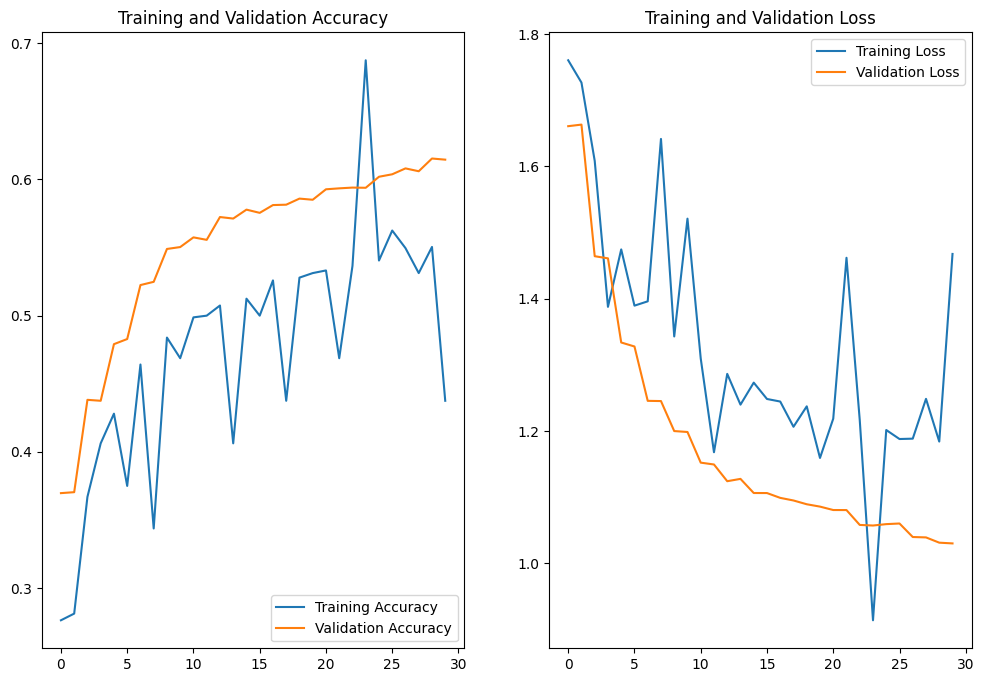

In [5]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves for training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


PICTURE TEST

In [1]:
import cv2
import numpy as np
from keras.models import load_model

model=load_model('model_file.h5')

faceDetect=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

labels_dict={0:'Angry',1:'Disgust', 2:'Fear', 3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

# len(number_of_image), image_height, image_width, channel

frame=cv2.imread("emotion.jpeg")
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces= faceDetect.detectMultiScale(gray, 1.3, 3)
for x,y,w,h in faces:
    sub_face_img=gray[y:y+h, x:x+w]
    resized=cv2.resize(sub_face_img,(48,48))
    normalize=resized/255.0
    reshaped=np.reshape(normalize, (1, 48, 48, 1))
    result=model.predict(reshaped)
    label=np.argmax(result, axis=1)[0]
    print(label)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 1)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(50,50,255),2)
    cv2.rectangle(frame,(x,y-40),(x+w,y),(50,50,255),-1)
    cv2.putText(frame, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
cv2.imshow("Frame",frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0


WEBCAM TEST

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

model=load_model('model_file.h5')

video=cv2.VideoCapture(0)

faceDetect=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

labels_dict={0:'Angry',1:'Disgust', 2:'Fear', 3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

while True:
    ret,frame=video.read()
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces= faceDetect.detectMultiScale(gray, 1.3, 3)
    for x,y,w,h in faces:
        sub_face_img=gray[y:y+h, x:x+w]
        resized=cv2.resize(sub_face_img,(48,48))
        normalize=resized/255.0
        reshaped=np.reshape(normalize, (1, 48, 48, 1))
        result=model.predict(reshaped)
        label=np.argmax(result, axis=1)[0]
        print(label)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 1)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(50,50,255),2)
        cv2.rectangle(frame,(x,y-40),(x+w,y),(50,50,255),-1)
        cv2.putText(frame, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow("Frame",frame)
    k=cv2.waitKey(1)
    if k==ord('q'):
        break

video.release()
cv2.destroyAllWindows()
#in code rooye case am zade shode dar in rasta eror nadashtan webcam mide ba laptop run shod drost bood

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
